In [1]:
# import packages
import os
import pandas as pd
import numpy as np
import load_data as load
import preprocessing as pre
import seaborn as sns;sns.set()
import matplotlib.pyplot as plt

In [3]:
PATH = 'D:/VScode_directory/14_days_project/Prediction modeling/Time Series Forecast on Energy Consumption/Dataset/'
# Load data 
file_name = os.listdir(PATH)
data_path=[]
for name in file_name:
    data_path.append(PATH+name)
data = pd.read_csv(data_path[file_name.index('NI_hourly.csv')])  # Load NI_hourly.csv

In [4]:
# Data Description
data.head()

Datetime   NI_MW
0  2004-12-31 01:00:00  9810.0
1  2004-12-31 02:00:00  9001.0
2  2004-12-31 03:00:00  8509.0
3  2004-12-31 04:00:00  8278.0
4  2004-12-31 05:00:00  8089.0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58450 entries, 0 to 58449
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  58450 non-null  object 
 1   NI_MW     58450 non-null  float64
dtypes: float64(1), object(1)
memory usage: 913.4+ KB


In [6]:
data.describe(include='all')

Datetime         NI_MW
count                 58450  58450.000000
unique                58450           NaN
top     2009-10-21 07:00:00           NaN
freq                      1           NaN
mean                    NaN  11701.682943
std                     NaN   2371.498701
min                     NaN   7003.000000
25%                     NaN   9954.000000
50%                     NaN  11521.000000
75%                     NaN  12896.750000
max                     NaN  23631.000000

In [7]:
# Check column of missing value
data.isnull().any()

Datetime    False
NI_MW       False
dtype: bool

In [8]:
# Check row of missing value
data.loc[data.isnull().any(axis=1),:]

Empty DataFrame
Columns: [Datetime, NI_MW]
Index: []

In [9]:
# Transform datatime
data['Datetime'] = pd.to_datetime(data['Datetime'])
data['year'] = data['Datetime'].dt.year
data['month'] = data['Datetime'].dt.month
data['day'] = data['Datetime'].dt.day
data['hour'] = data['Datetime'].dt.hour
data['minute'] = data['Datetime'].dt.minute
data['second'] = data['Datetime'].dt.second

In [10]:
# Data describe
data.describe()

NI_MW          year         month           day          hour  \
count  58450.000000  58450.000000  58450.000000  58450.000000  58450.000000   
mean   11701.682943   2007.148246      6.722224     15.736647     11.502207   
std     2371.498701      1.931479      3.402549      8.802695      6.921595   
min     7003.000000   2004.000000      1.000000      1.000000      0.000000   
25%     9954.000000   2005.000000      4.000000      8.000000      6.000000   
50%    11521.000000   2007.000000      7.000000     16.000000     12.000000   
75%    12896.750000   2009.000000     10.000000     23.000000     18.000000   
max    23631.000000   2011.000000     12.000000     31.000000     23.000000   

        minute   second  
count  58450.0  58450.0  
mean       0.0      0.0  
std        0.0      0.0  
min        0.0      0.0  
25%        0.0      0.0  
50%        0.0      0.0  
75%        0.0      0.0  
max        0.0      0.0

In [11]:
# Drop constant column
pre.drop_constant_column(data)

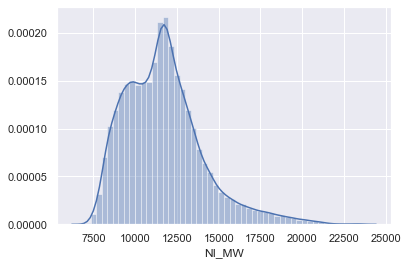

In [12]:
# Distplot for NI_MW value
sns.distplot(data['NI_MW'])
plt.show()

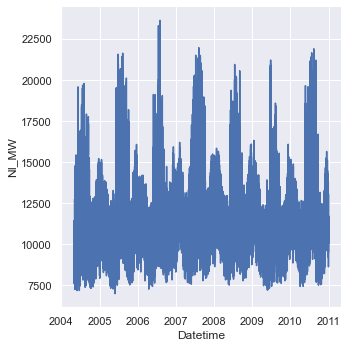

In [13]:
# Relplot for all datetime
sns.relplot(x='Datetime',y='NI_MW' , kind='line' , ci=None , data = data)
plt.tight_layout()
plt.show()

In [15]:
# groupby year and month and calculation mean(NI_MW)
year_month = data.groupby(['year','month']).mean()
year_month['year_month'] = year_month.index.get_level_values('year').astype('str') +'-' + year_month.index.get_level_values('month').astype('str')
year_month['year'] = year_month.index.get_level_values('year').astype('str')
year_month['month'] = year_month.index.get_level_values('month')
# Relplot for year_month
fig = sns.relplot(x='year_month',y='NI_MW' , kind='line' , ci=None , data = year_month)
plt.xticks(year_month['year_month'],year_month['year_month'], rotation='vertical')
plt.show()

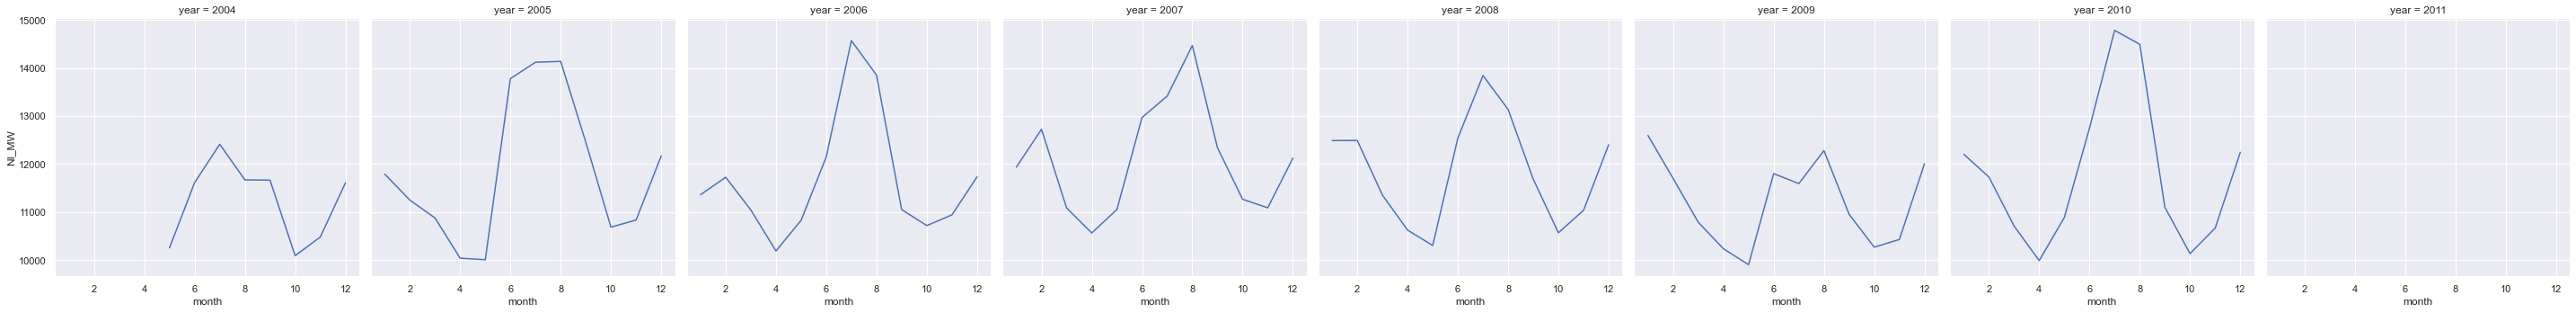

In [16]:
# Replot NI_MW of month  of Individual years 
sns.relplot(x='month',y='NI_MW' ,col='year', kind='line'  , data = year_month)
plt.show()

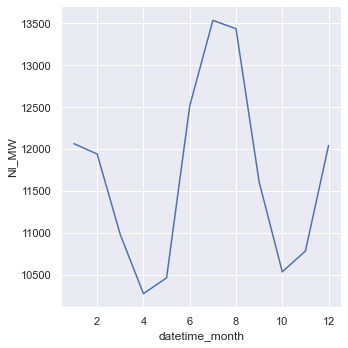

In [18]:
# groupby month and calculation mean(NI_MW)
month = data.groupby('month').mean()
month['datetime_month'] = month.index
# Relplot for months of all years
sns.relplot(x='datetime_month',y='NI_MW' , kind='line' , ci=None , data = month)
plt.show()

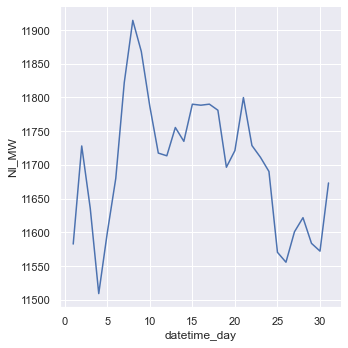

In [19]:
# groupby day and calculation mean(NI_MW)
day = data.groupby('day').mean()
day['datetime_day'] = day.index
# Relplot for days of all years
sns.relplot(x='datetime_day',y='NI_MW' , kind='line' , ci=None , data = day)
plt.show()

In [20]:
# groupby hour and calculation mean(NI_MW)
hour = data.groupby('hour').mean()
hour['datetime_hour'] = hour.index
# Relplot for hour of all years
sns.relplot(x='datetime_hour',y='NI_MW' , kind='line' , ci=None , data = hour ,col_order=['1','2','3','4','5','6','7','8','9','10','11','12'])
plt.show()
